# Feature Engineering Introduction

<div class="alert alert-info">

- Start with the raw data.
- Take everything you have. Cover all available information in the data with features
- Guess what the target depends on? (wear time depends on the number of trips)
- Look visually at classes/errors and make assumptions. Which ones are useful?
- Quite a few features can be harmful. Then you have to filter it out.

# 1. Datasets

## 1.1 car_train dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)
from classes import Paths
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
# https://seaborn.pydata.org/tutorial/color_palettes.html
# sns.set_theme(style="whitegrid", palette="pastel")
# sns.set_theme(style="whitegrid", palette="cubehelix")
# sns.set_theme(style="whitegrid", palette="YlOrBr")
# sns.set_theme(style="whitegrid", palette="Paired")
sns.set_theme(style="whitegrid", palette="Set2")

In [2]:
paths = Paths()
train = pd.read_csv(paths.car_train)
print(train.shape)
train.head(10)

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,50.93,engine_ignition
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.79,engine_overheat
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.26,gear_stick
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.24,gear_stick
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.43,gear_stick


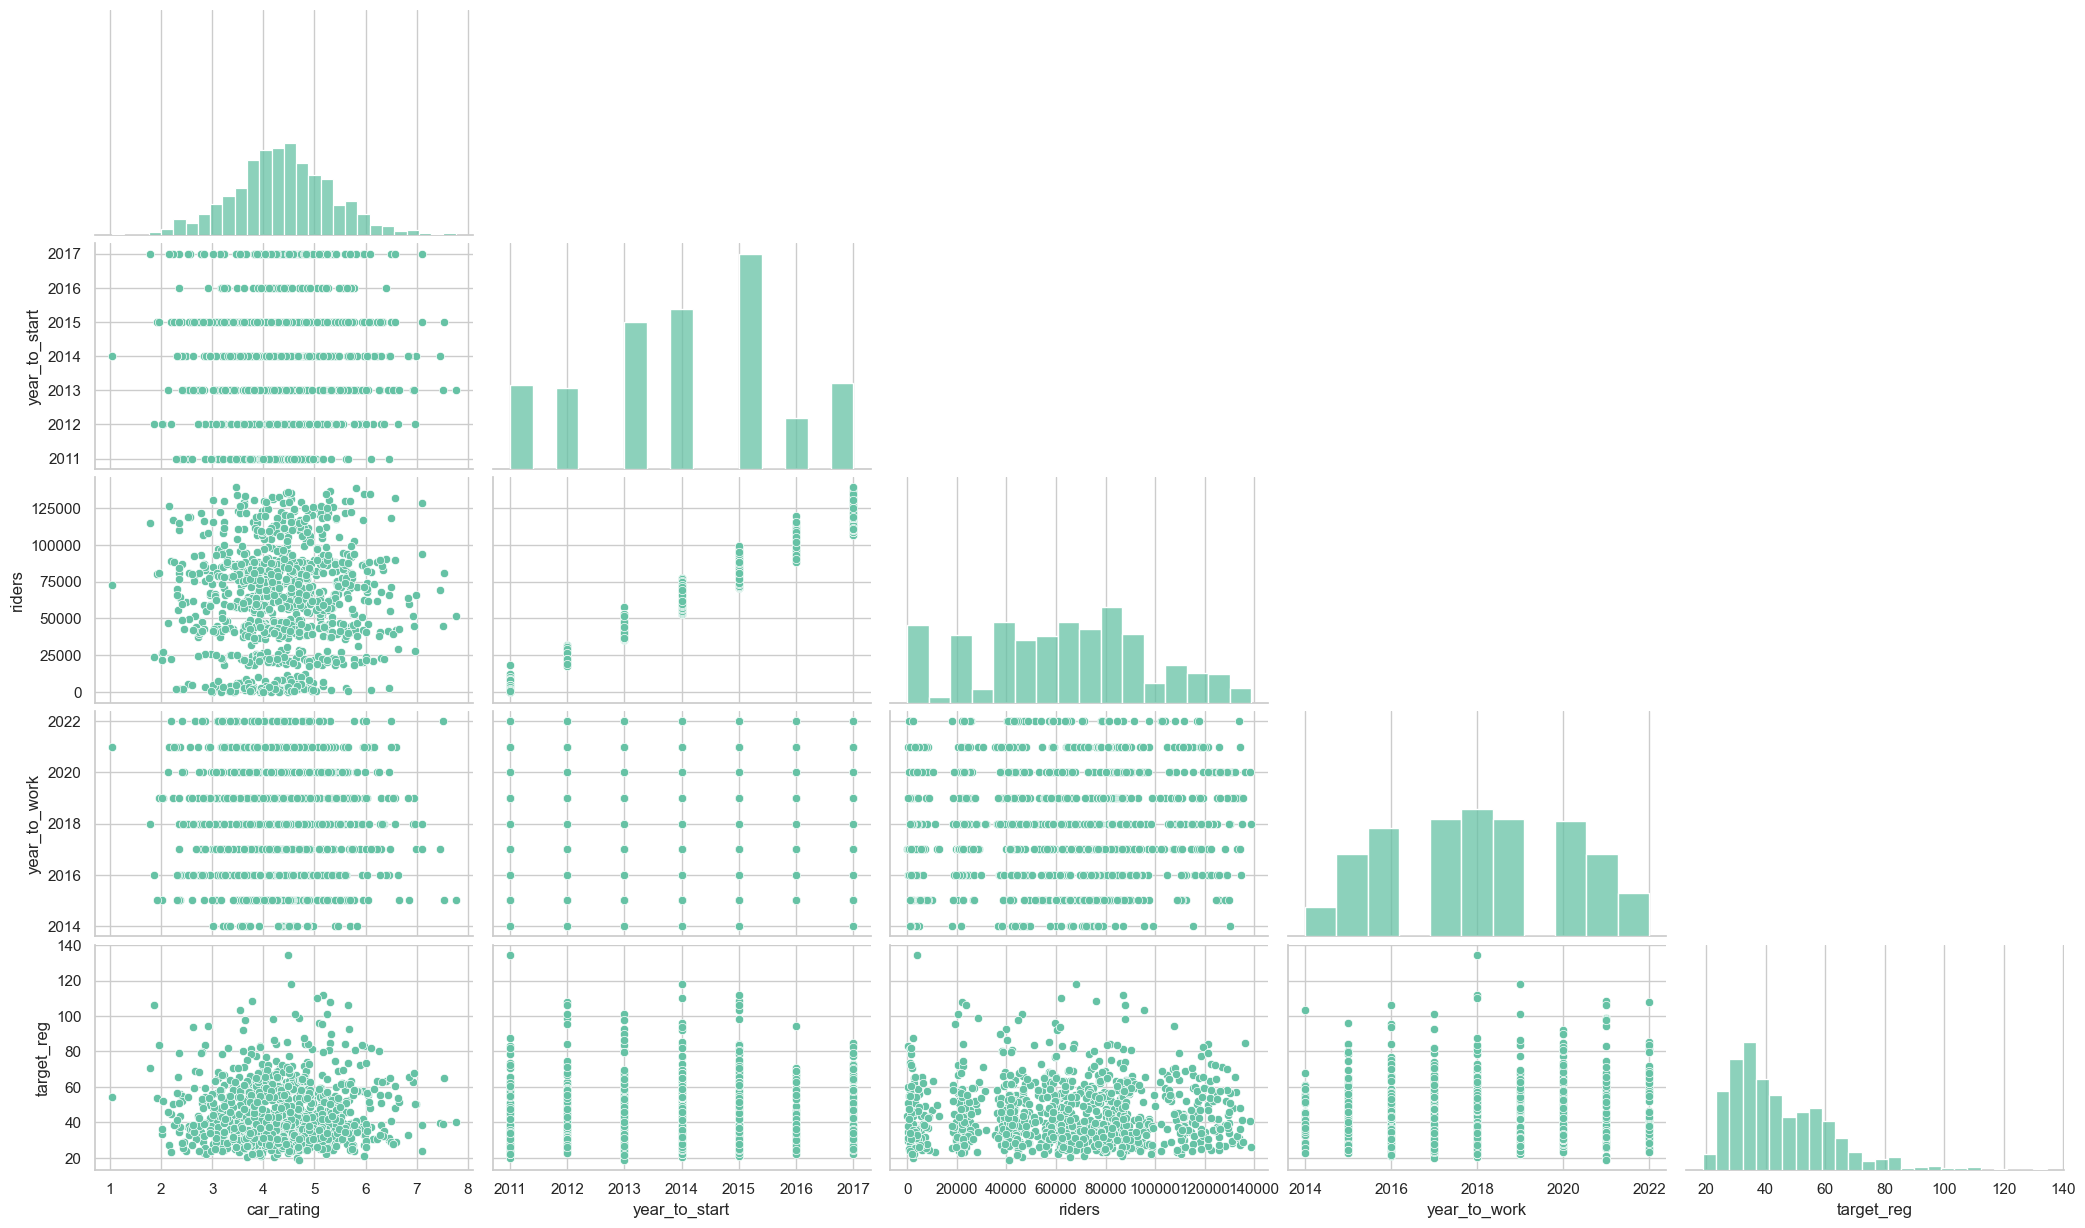

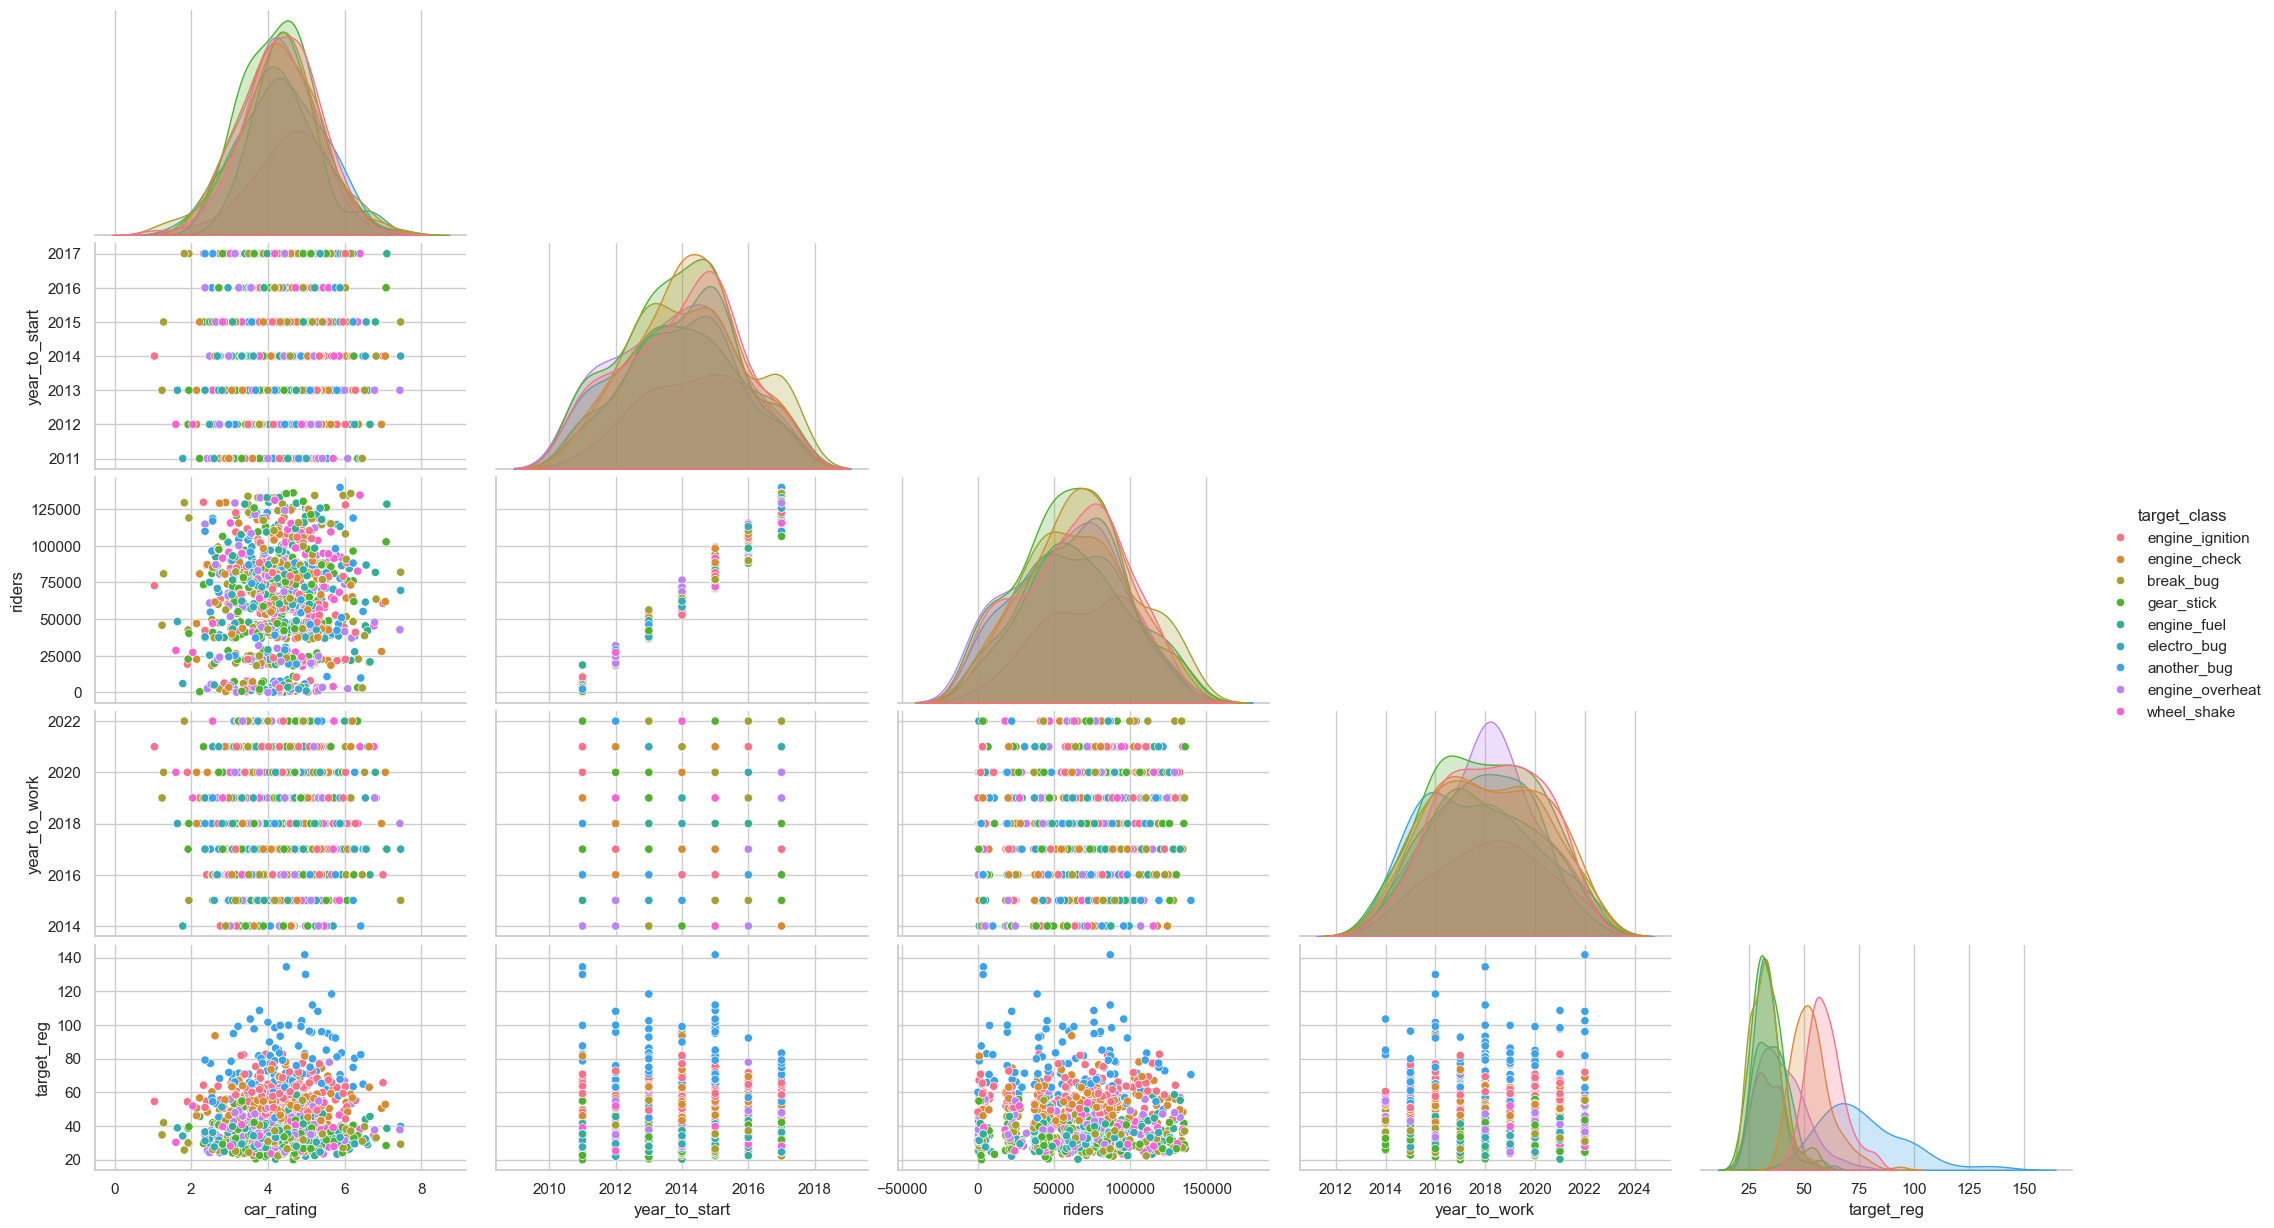

In [3]:
# train.hist(figsize=(25, 4), layout=(2, 5), bins=30);

sns.pairplot(
    train.sample(1000)
    , vars=train.select_dtypes(np.number).columns
    , corner=True
    , aspect=1.7
    # , hue="target_class"
);

sns.pairplot(
    train.sample(1000)
    , vars=train.select_dtypes(np.number).columns
    , corner=True
    , hue="target_class"
    , aspect=1.7
);

* `car_id` - ID of the car
* `model` / `car_type` / `fuel_type` - brand, class, and fuel type of the car
* `car_rating` / `riders` - the overall rating and the total number of rides by the end of the 2021 year.
* `year_to_start` / `year_to_work` - the year the car was built and started working in the fleet. 
* `target_reg` - the number of days before the breakdown.
* `target_class` - class of breakage (9 types in total)

## 1.2 rides_info dataset

In [4]:
rides_info = pd.read_csv(paths.rides_info)
print(rides_info.shape)
rides_info.head(10)

(739500, 14)


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.55,0,514.25,0,1.12,2.91
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.00,1,197.52,0,1.65,4.13
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.96,0,"1,276.33",0,2.60,2.46
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.00,0,535.68,0,3.22,0.91
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.00,1,"1,729.14",0,2.72,-1.82
5,I45176130J,A-1049127W,j1v,2020-01-03,7.52,67,1068,28,36.00,2,363.21,0,0.50,-3.44
6,W11562554A,A-1049127W,A1g,2020-01-04,5.78,30,324,48,61.00,0,"1,314.26",0,1.46,-6.00
7,o13713369s,A-1049127W,B1n,2020-01-04,7.35,29,401,57,65.85,0,"1,753.89",0,0.50,-6.47
8,y62286141d,A-1049127W,h1a,2020-01-05,0.12,64,893,38,114.00,1,"2,022.13",0,-0.16,-5.12
9,V28486769l,A-1049127W,p1e,2020-01-05,3.32,43,424,31,51.30,1,"1,334.57",0,-3.76,-2.08


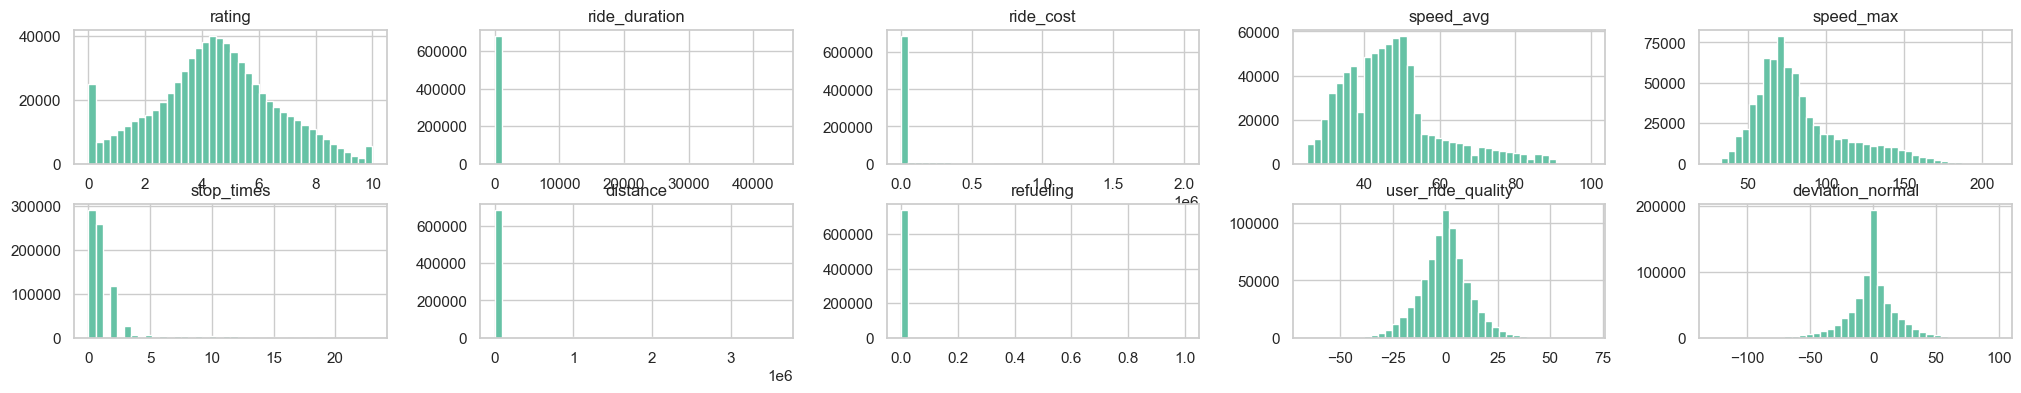

In [5]:
rides_info.hist(
    figsize = (25, 4)
    , layout = (2,-1)
    , bins=40
);

<div class="alert alert-info">

* `user_id` / `car_id` / `ride_id` - ids of the driver, car, and ride, respectively
* `ride_date` / `rating` - the date of the trip and the rating given by the driver 
* `ride_duration` / `distance` / `ride_cost` - duration (time), distance traveled, cost of the ride
* `speed_avg` / `speed_max` - average and maximum ride speeds, respectively
* `stop_times` / `refueling` - the number of stops (pauses) and the flag - whether there was refueling.
* `user_ride_quality` - assessment of the driving style in the driver's car, determined by the ML scoring system of the service.
* `deviation_normal` is a general indicator of the sensors about the condition of the machine, relative to the reference indicators (norms).

## 1.3 fix_info dataset

In [6]:
fix_info = pd.read_csv(paths.fix_info)
print(fix_info.shape)
fix_info.head(10)

(146000, 6)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.00,28
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.00,47
5,O41613818T,RW,2019-2-21 13:25,reparking,1.00,32
6,l-1139189J,PO,2020-3-2 19:11,reparking,1.00,28
7,d-2109686j,ML,2018-3-2 5:12,repair,7.40,39
8,u29695600e,QN,2020-2-2 20:10,reparking,10.00,64
9,U75286923j,KC,2019-9-2 6:32,reparking,1.00,24


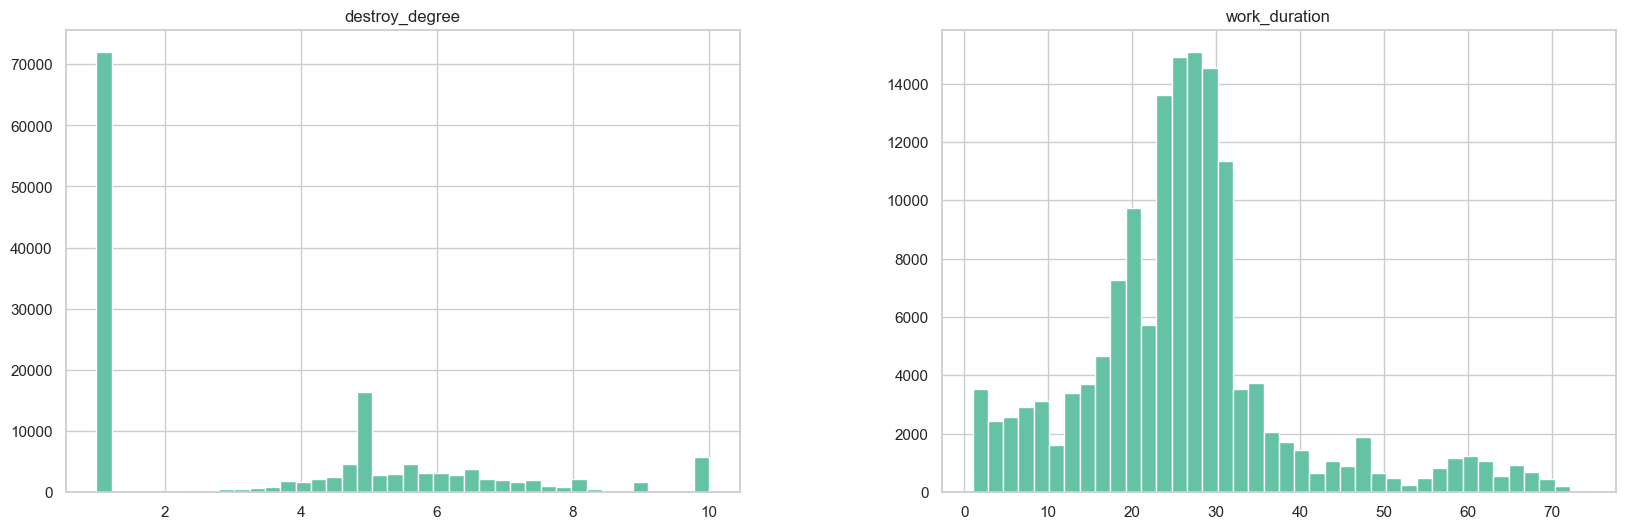

In [7]:
fix_info.hist(
    figsize=(20,6)
    , layout=(1,-1)
    , bins=40
);

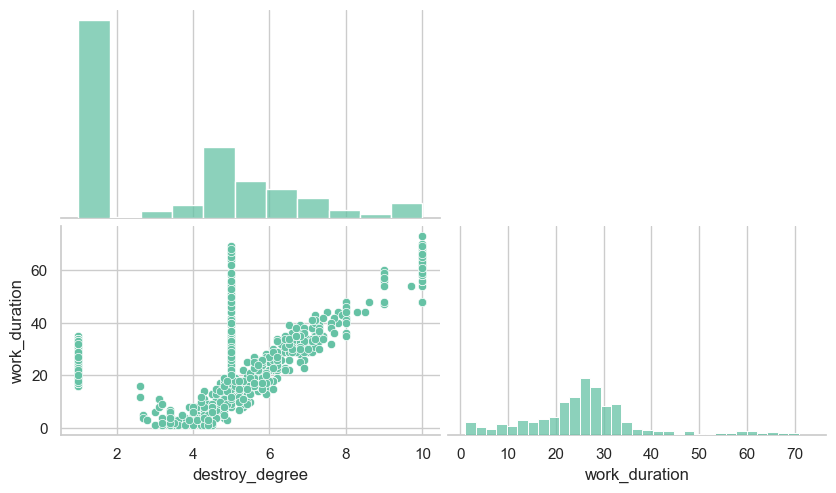

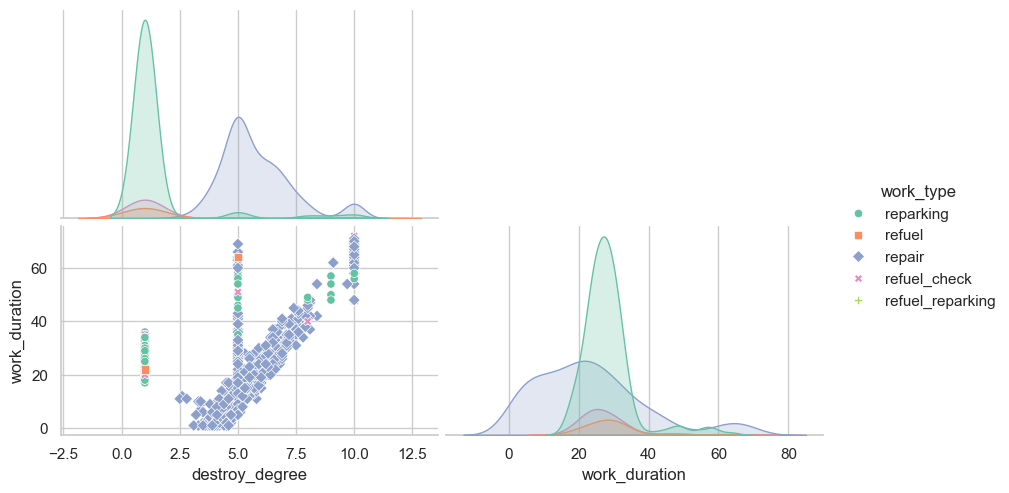

In [8]:
sns.pairplot(
    data=fix_info.sample(1000)
    , vars = fix_info.select_dtypes(np.number).columns
    # , hue="work_type"
    , corner=True
    , aspect=1.7
    , markers=["o", "s", "D", "X", "P"]
);
sns.pairplot(
    data=fix_info.sample(1000)
    , vars = fix_info.select_dtypes(np.number).columns
    , hue="work_type"
    , corner=True
    , aspect=1.7
    , markers=["o", "s", "D", "X", "P"]
);

<div class="alert alert-info">

* `worker_id` / `car_id` - the identifier of the employee and the machine, respectively 
* `work_type` / `work_duration` - type and duration (in hours) of the work performed
* `destroy_degree` - the degree of destruction/damage to the car in case of a breakdown
* `fix_date` - start time of the repair (time of removing the car from the line)

# 2. Grouping + aggregating functions

## 2.1 `.groupby()` + `.agg()`

<div class="alert alert-info">

`df.aggregate()` == `df.agg()` - Aggregates using one or more specified operations/functions along a given axis.

**common way (not the best one):**

In [9]:
fix_info.groupby("car_id", as_index=False).aggregate({
        "worker_id": ["count"],
        "work_duration": ["max", "mean"],
    }
).head(3)

car_id worker_id work_duration      
                  count           max  mean
0  A-1049127W        35            56 27.49
1  A-1079539w        34            64 27.38
2  A-1162143G        34            69 27.82

**same functionality (elegant way):**

In [10]:
fix_info.groupby("car_id", as_index=False).agg(
    worker_id_count=("worker_id", "count"),
    work_duration_max=("work_duration", "max"),
    work_duration_mean=("work_duration", "mean"),
).head(3)

,car_id,worker_id_count,work_duration_max,work_duration_mean
0,A-1049127W,35,56,27.49
1,A-1079539w,34,64,27.38
2,A-1162143G,34,69,27.82


## 2.2 `.groupby()` + `.transform()`

<div class="alert alert-info">

`df.transform()` - calls a function to independently create a `DataFrame' with the same axis shape as the original table.

**Elegant way (no need in creating tmp and merging it with original df):**

In [11]:
print(fix_info.shape)

fix_info["worker_speed"] = fix_info.groupby("worker_id")["work_duration"].transform("mean")

print(fix_info.shape)

fix_info.head(3)

(146000, 6)
(146000, 7)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49,25.41
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48,26.82
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27,25.71


**adding aggregated feature using tmp-table:**

In [12]:
tmp = fix_info.groupby("worker_id", as_index=False).agg(
    work_duration_mean=("work_duration", "mean")
)

fix_info.merge(tmp, on="worker_id", how="left").head(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,work_duration_mean
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49,25.41,25.41
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48,26.82,26.82
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27,25.71,25.71


In [13]:
fix_info["worker_experience"] = fix_info.groupby("worker_id")["car_id"].transform(
    "count"
)
fix_info.head(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,worker_experience
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49,25.41,254
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48,26.82,268
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27,25.71,301


## 2.3 `.groupby()` + `agg()` + previously defined function

In [14]:
fix_info.head(10)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,worker_experience
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49,25.41,254
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48,26.82,268
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27,25.71,301
3,y13744087j,PG,2019-8-10 9:29,reparking,1.00,28,26.46,275
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.00,47,25.76,264
5,O41613818T,RW,2019-2-21 13:25,reparking,1.00,32,26.57,290
6,l-1139189J,PO,2020-3-2 19:11,reparking,1.00,28,26.27,238
7,d-2109686j,ML,2018-3-2 5:12,repair,7.40,39,25.88,272
8,u29695600e,QN,2020-2-2 20:10,reparking,10.00,64,25.71,282
9,U75286923j,KC,2019-9-2 6:32,reparking,1.00,24,25.72,239


In [15]:
# number of unique values
f_nuniq = lambda x: x.nunique()

# number of values more than n
more_than_n_func = lambda x, n=8: sum(x > n)

# 30th percentile / 0.3-level quantile
def quant_func(x, q=0.3):
    return x.quantile(q)

In [16]:
# function that returns first and second mode for categorical features
first_mode = lambda x: x.value_counts().index[0]
second_mode = lambda x: x.value_counts().index[1]

In [17]:
fix_info

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,worker_experience
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49,25.41,254
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48,26.82,268
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27,25.71,301
3,y13744087j,PG,2019-8-10 9:29,reparking,1.00,28,26.46,275
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.00,47,25.76,264
...,...,...,...,...,...,...,...,...
145995,j92079780S,NG,2019-1-21 14:34,reparking,1.00,36,26.14,293
145996,N89944460U,WM,2019-4-30 11:33,repair,2.60,13,25.78,258
145997,f63189062N,NY,2019-3-7 20:49,repair,5.00,14,27.50,265
145998,j-1712772o,IP,2018-2-18 19:10,repair,5.00,13,26.04,272


In [18]:
fix_info_gr = fix_info.groupby("car_id", as_index=False).agg(
    
    # built-in functions calculating statistics
    worker_count=("worker_id", "count"),
    work_duration_mean=("work_duration", "mean"),
    work_duration_max=("work_duration", "max"),
    destroy_degree_std=("destroy_degree", "std"),
    destroy_degree_sum=("destroy_degree", "sum"),
    
    # functions for categorical features defined by us
    work_type_nuniq=("work_type", f_nuniq),
    work_type_mode=("work_type", first_mode),
    work_type_second_mode=("work_type", second_mode),
    
    # functions for numerical features defined by us
    destroy_degree_crit_q=("destroy_degree", more_than_n_func),
    worker_quant_exp=("worker_experience", quant_func),
)

fix_info_gr.sample(3)

,car_id,worker_count,work_duration_mean,work_duration_max,destroy_degree_std,destroy_degree_sum,work_type_nuniq,work_type_mode,work_type_second_mode,destroy_degree_crit_q,worker_quant_exp
2354,d-1302572o,34,23.88,61,1.89,92.80,4,reparking,repair,0,261.70
3630,s17672064L,35,28.14,67,3.25,121.30,4,reparking,repair,4,261.00
2036,Z-9551096Z,34,24.09,53,2.60,136.30,3,repair,reparking,3,263.00


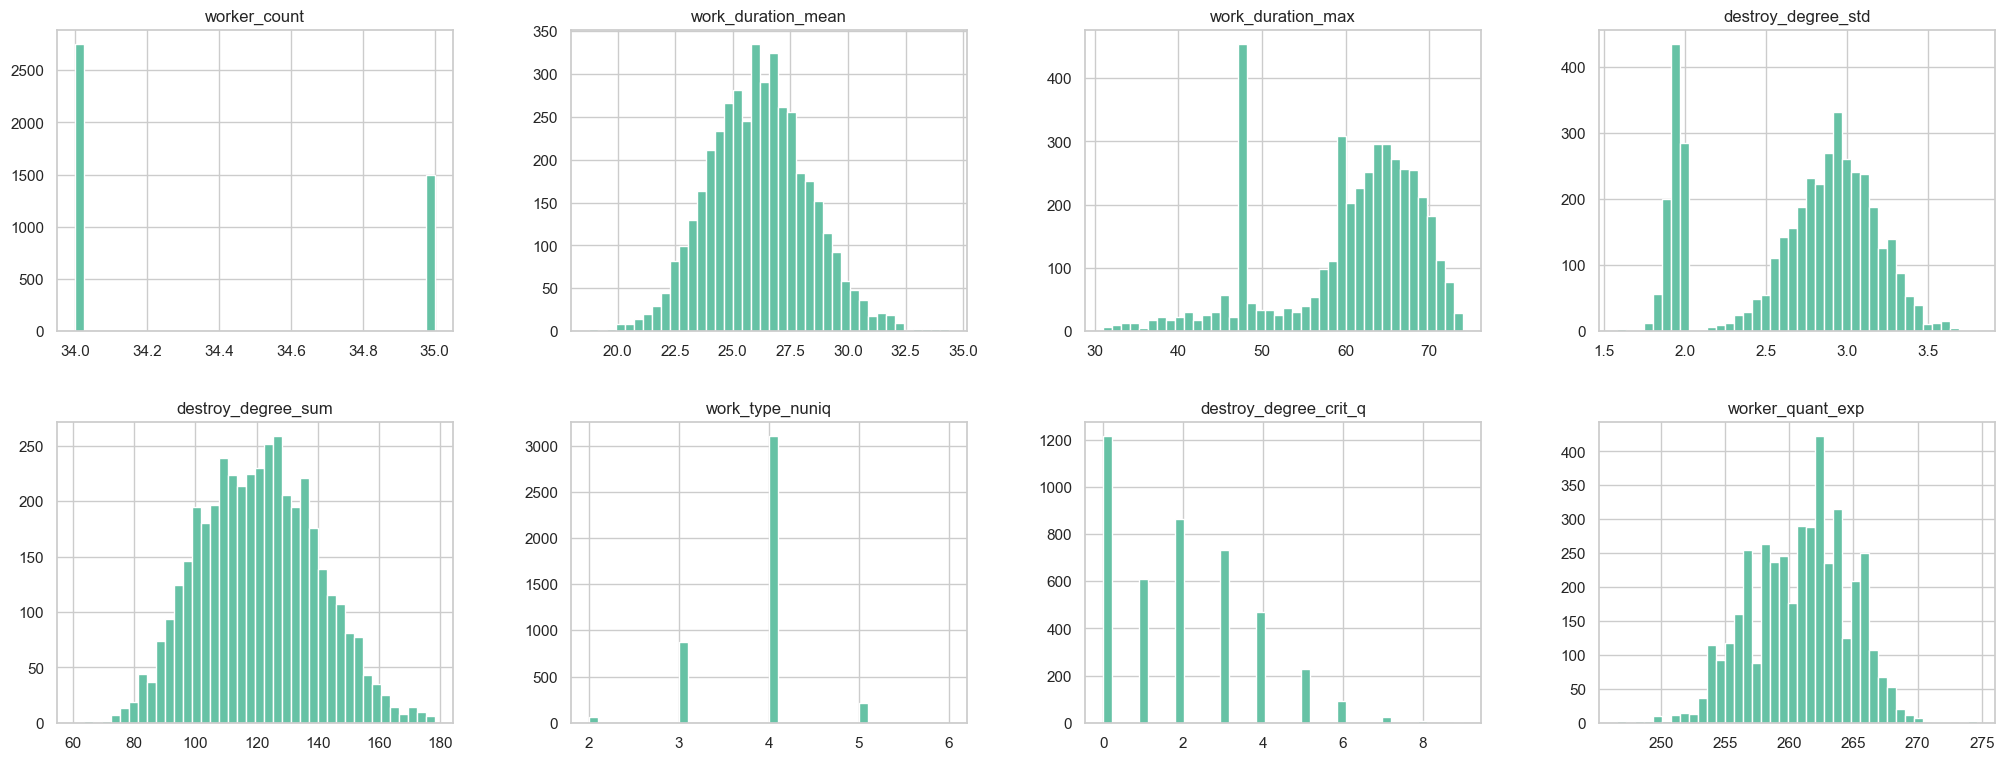

In [19]:
fix_info_gr.hist(figsize=(25, 9), layout=(2, 4), bins=40);

# 3. Check the features

<div class="alert alert-info">

When generating features, something can easily go wrong. <br>
You thought of one thing, but you actually got something completely different.

* `df.feature.hist()` - displays histogram
* `df.feature.value_counts()` - shows numeric distribution

,car_id,good_feature,gold_feature,killer_feature,bad_feature
1400,R-1143403S,24.80,60,2.88,0
345,E-1889080W,26.66,66,1.95,0
4085,y-1223003V,26.09,67,2.91,0


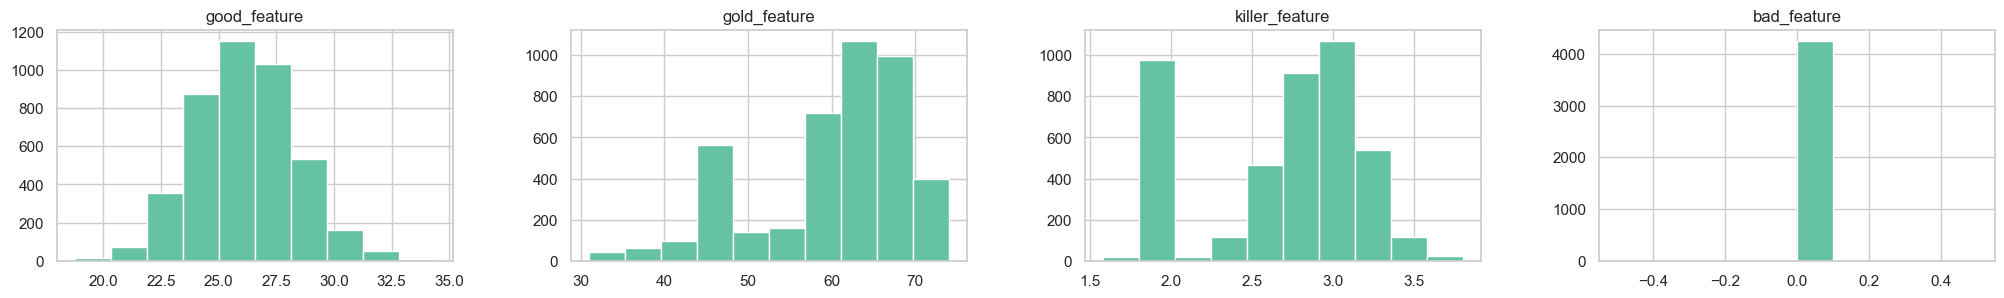

In [20]:
bad_func = lambda x: sum(x <= -100)

tmp = fix_info.groupby("car_id", as_index=False).agg(

    # built-in functions for numerical features
    good_feature =("work_duration", "mean"),
    gold_feature =("work_duration", "max"),
    killer_feature =("destroy_degree", "std"),

    # defined functions for categorical features
    bad_feature =("destroy_degree", bad_func),
)

tmp.hist(figsize=(25, 3), layout=(1, 4))
tmp.sample(3)

# 4. Feature generation => Visual feature analysis => Feature generation

In [21]:
# add new features to the train dataset
tmp = train.merge(fix_info_gr, on="car_id", how="left")
tmp.head(3)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,worker_count,work_duration_mean,work_duration_max,destroy_degree_std,destroy_degree_sum,work_type_nuniq,work_type_mode,work_type_second_mode,destroy_degree_crit_q,worker_quant_exp
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,35,26.66,56,2.73,106.70,4,reparking,repair,2,268.20
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug,35,24.94,48,2.71,102.10,5,reparking,repair,1,257.00
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick,35,26.14,59,2.98,130.90,5,repair,reparking,2,261.40


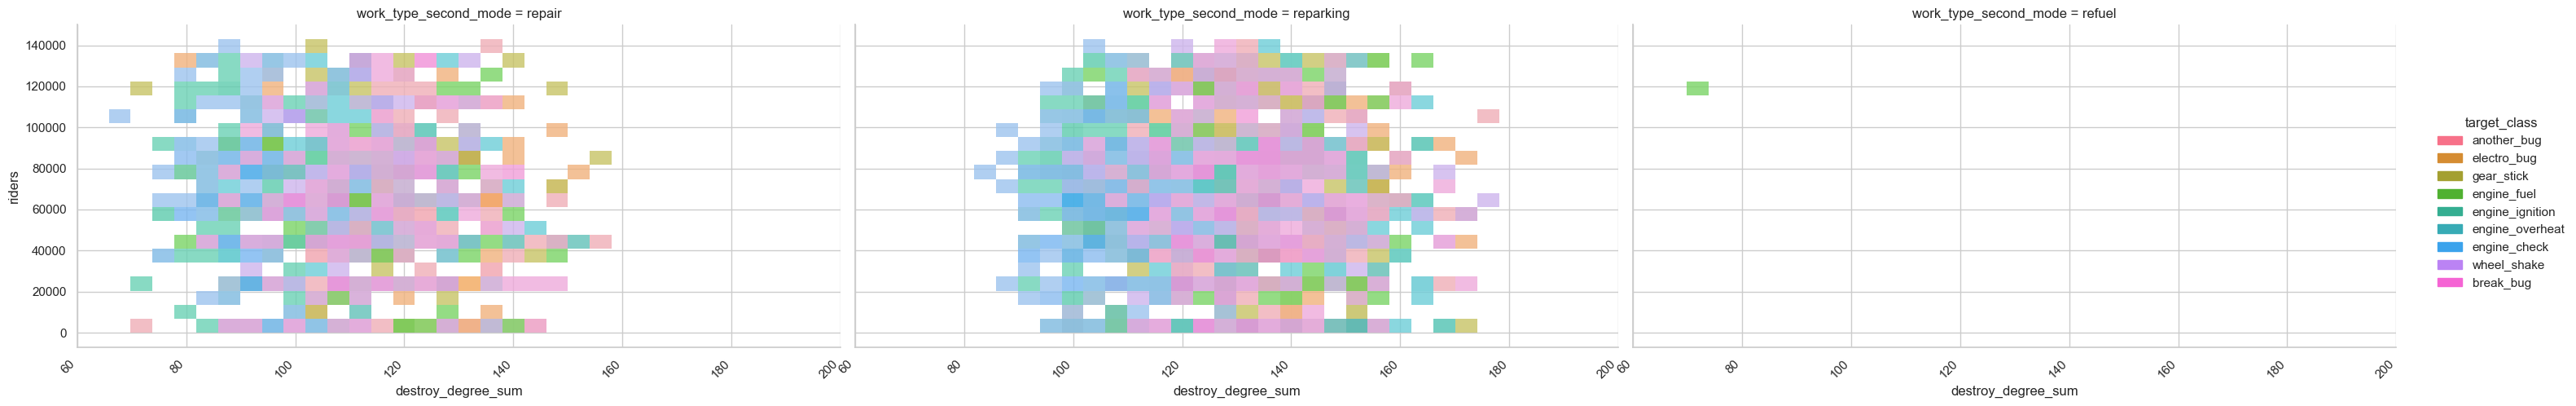

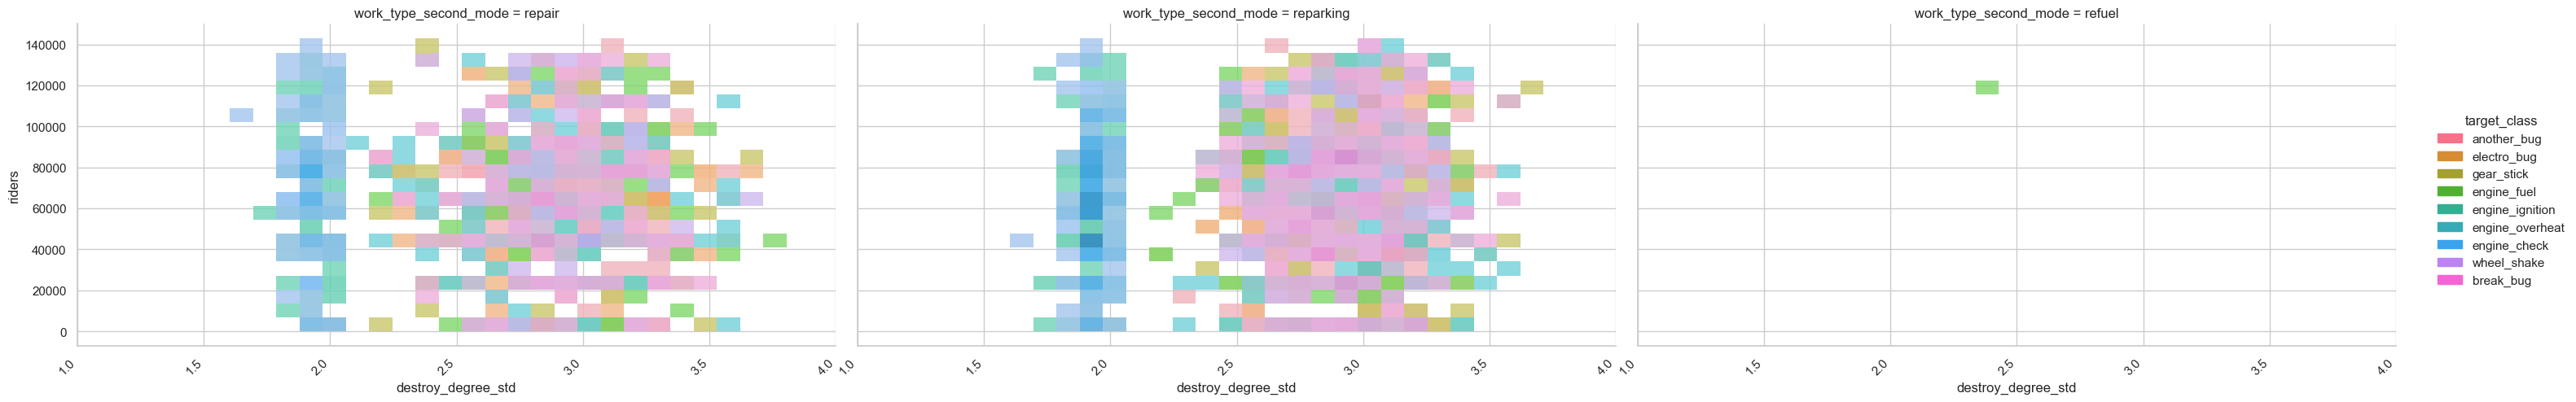

In [22]:
g = sns.displot(
    data=tmp,
    x="destroy_degree_sum",
    y="riders",
    aspect=2,
    kind="hist",
    alpha=0.8,
    hue="target_class",
    col="work_type_second_mode",
).set_xticklabels(rotation=45, horizontalalignment="right");

g = sns.displot(
    data=tmp,
    x="destroy_degree_std",
    y="riders",
    aspect=2,
    kind="hist",
    alpha=0.8,
    hue="target_class",
    col="work_type_second_mode",
).set_xticklabels(rotation=45, horizontalalignment="right");

<div class="alert alert-info">

Visually, it can be seen that `destroy_degree_std` is more useful for classification than the `destroy_degree_sum` feature.

## 4.1 `pivot()`/`pivot_table()` + `aggfunc()`

<img src="../imgs/03.1.07_2.png" width="600">

In [23]:
fix_info.head(3)

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration,worker_speed,worker_experience
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49,25.41,254
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48,26.82,268
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27,25.71,301


In [24]:
fix_info_pivot = fix_info.pivot_table(
    index="car_id",  # Строка, для которой хотим сгенерировать признаки
    columns=["work_type"],  # колонка, которую вытяним в столбец
    values=["destroy_degree"],  # столбец, по которой будем считать статистики
    aggfunc=["mean", 'count'],  # признаки для генерации (mean/count/sum)
).fillna(0)
fix_info_pivot

mean                                              \
           destroy_degree                                               
work_type      oil_change refuel refuel_check refuel_reparking repair   
car_id                                                                  
A-1049127W           0.00   1.00         2.40             0.00   6.00   
A-1079539w           0.00   1.00         1.00             0.00   5.66   
A-1162143G           0.00   0.00         1.00             0.00   6.60   
A-1228282M           0.00   1.00         2.33             0.00   4.79   
A-1339912r           0.00   1.00         1.00             0.00   4.85   
...                   ...    ...          ...              ...    ...   
z73688663a           0.00   1.00         1.00             0.00   4.98   
z73740510r           0.00   0.00         1.00             0.00   6.18   
z86911952C           9.00   3.00         1.00             0.00   6.13   
z91353693Z           0.00   1.00         1.00             0.00   6.52   
z91796444U           0.00   1.00         1.00             0.00   6.06   

                              count                                       \
                     destroy_degree                                        
work_type  reparking     oil_change refuel refuel_check refuel_reparking   
car_id                                                                     
A-1049127W      1.40           0.00   1.00         5.00             0.00   
A-1079539w      3.43           0.00   1.00         2.00             0.00   
A-1162143G      1.53           0.00   0.00         4.00             0.00   
A-1228282M      1.27           0.00   1.00         3.00             0.00   
A-1339912r      1.33           0.00   2.00         3.00             0.00   
...              ...            ...    ...          ...              ...   
z73688663a      1.00           0.00   2.00         2.00             0.00   
z73740510r      1.50           0.00   0.00         4.00             0.00   
z86911952C      1.47           1.00   4.00         3.00             0.00   
z91353693Z      3.08           0.00   2.00         3.00             0.00   
z91796444U      1.00           0.00   1.00         4.00             0.00   

                             
                             
work_type  repair reparking  
car_id                       
A-1049127W   9.00     20.00  
A-1079539w  17.00     14.00  
A-1162143G  15.00     15.00  
A-1228282M  15.00     15.00  
A-1339912r  17.00     12.00  
...           ...       ...  
z73688663a  15.00     16.00  
z73740510r  17.00     14.00  
z86911952C  12.00     15.00  
z91353693Z  17.00     12.00  
z91796444U  11.00     19.00  

[4250 rows x 12 columns]

In [25]:
fix_info_pivot.columns = [f"{i[2]}_{i[0]}" for i in fix_info_pivot.columns]
fix_info_pivot.reset_index(inplace=True)

fix_info_pivot.sample(3)

,car_id,oil_change_mean,refuel_mean,refuel_check_mean,refuel_reparking_mean,repair_mean,reparking_mean,oil_change_count,refuel_count,refuel_check_count,refuel_reparking_count,repair_count,reparking_count
1641,T69253406y,0.00,1.00,1.00,0.00,5.99,1.90,0.00,5.00,1.00,0.00,18.00,10.00
4034,x-8934991u,0.00,1.00,2.75,0.00,6.69,2.60,0.00,1.00,4.00,0.00,19.00,10.00
2532,f-1853653Z,0.00,1.00,1.00,0.00,4.88,1.42,0.00,1.00,2.00,0.00,12.00,19.00


## 4.2 Drivers features generation

In [26]:
import pandas as pd

train = pd.read_csv(paths.car_train)
rides = pd.read_csv(paths.rides_info)

rides = train.merge(rides, on="car_id", how="left")
rides.head(4)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00


In [27]:
tmp = rides
cols2select = [ "deviation_normal", "ride_date", "target_class", "car_id", "user_ride_quality", ]
ids2select = ["f-4873956c", "p-7109749V", "p-3304414p", "f-1300760u", "L-4452446Z"]
tmp = tmp[tmp["car_id"].isin(tmp.car_id.sample(1000, random_state=8).unique()[:15])]
tmp = tmp[tmp["car_id"].isin(ids2select)][cols2select]

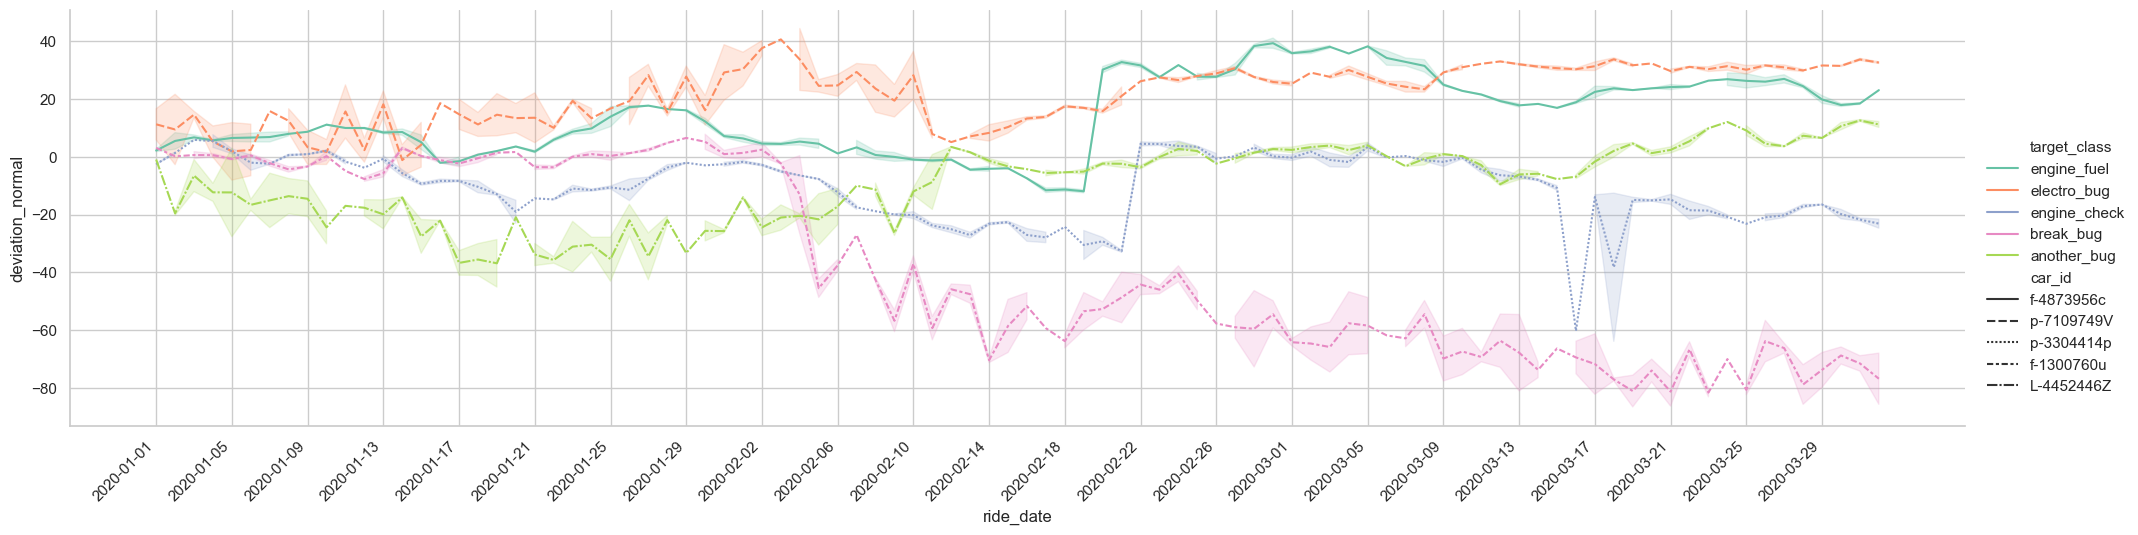

In [28]:
g = sns.relplot(
    data=tmp,
    kind="line",
    x="ride_date",
    y="deviation_normal",  # user_ride_quality
    hue="target_class",
    aspect=4,
    style="car_id",
    legend=True,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=4);

Each car has its own travel history, which has its own patterns depending on future breakdown.    
    
- Statistics (average/variance/maximum/quantity)
- Complex features using functions

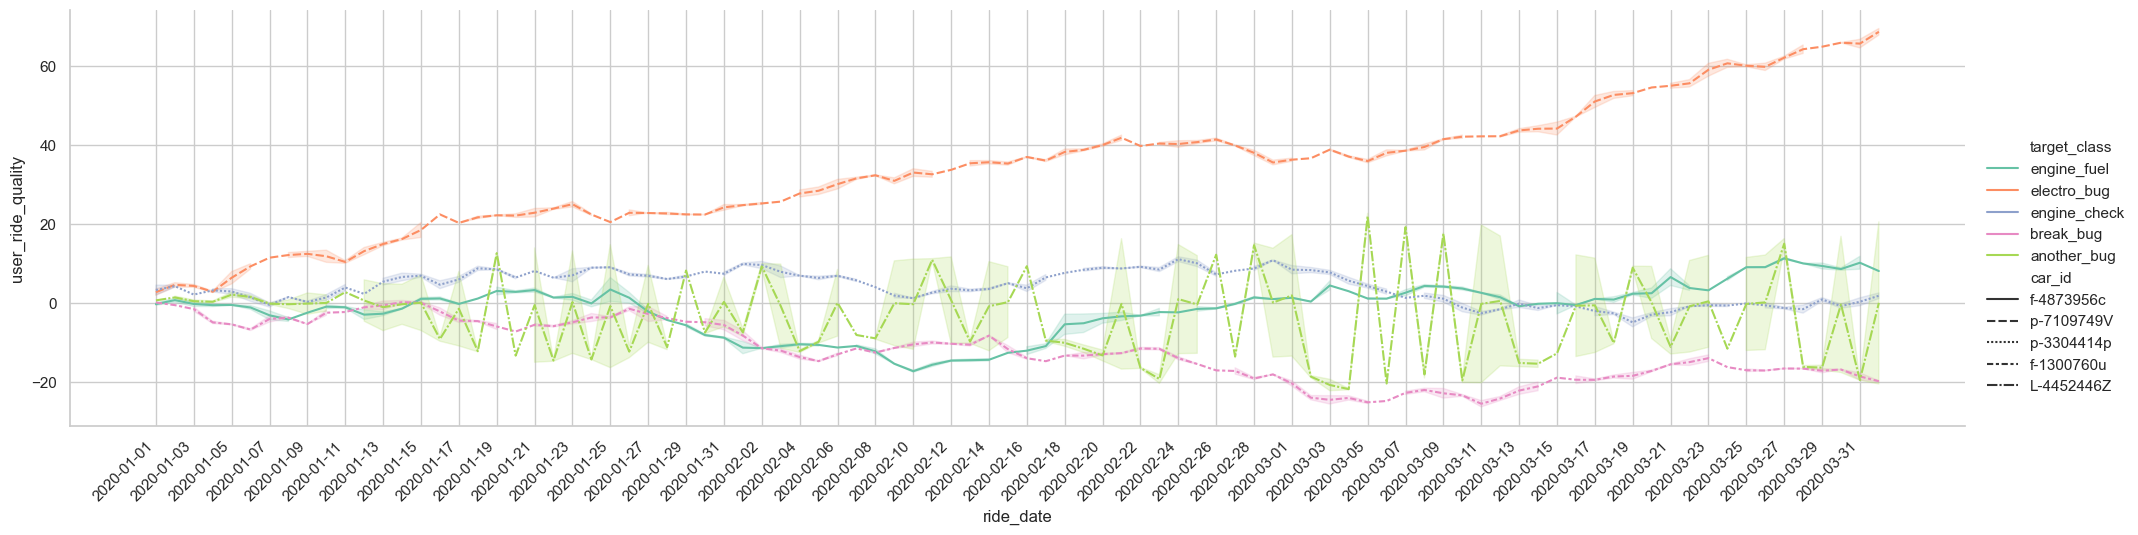

In [29]:
g = sns.relplot(
    data=tmp,
    kind="line",
    x="ride_date",
    y="user_ride_quality",  # user_ride_quality
    hue="target_class",
    aspect=4,
    style="car_id",
    legend=True,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

<div class="alert alert-warning">

## Task

<div class="alert alert-info">

You may not need all these signs for the course task, but this is a good chance to practice. After these tasks, you will feel more free to extract useful patterns from logs and time series.

* `feature_min_max_diff` : the difference between the maximum and minimum values of `deviation_normal` for each machine
* `feature_corner` : tilt angle based on `user_ride_quality` for each machine
* `feature_mean` : the average value of `deviation_normal` for each machine
* `feature_shift` : inflection/shift point for `deviation_normal`
* `feature_start` : the value of the start point for `deviation_normal`
* `feature_nans`: the sum of passes for the column `...` for each machine 
* `feature_quant`: `X %` quantile for column `...` for each machine

In [30]:
rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00


In [31]:
minmax = lambda x: x.max() - x.min()

rides['feature_min_max_diff'] = rides.groupby('car_id')['deviation_normal'].transform(minmax).head()
rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,feature_min_max_diff
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00,9.00
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00,9.00
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00,9.00
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00,9.00
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34,NaN
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19,NaN
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59,NaN
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00,NaN


In [32]:
# Define a function to calculate the tilt angle
def calculate_tilt_angle(series):
    # Assuming tilt angle is calculated as the arctan of the mean user ride quality
    return np.degrees(np.arctan(series.mean()))

# Group by 'machine_id' and calculate the tilt angle based on 'user_ride_quality'
rides['feature_corner'] = rides.groupby('car_id')['user_ride_quality'].transform(calculate_tilt_angle)
rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,feature_min_max_diff,feature_corner
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00,9.00,-42.02
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00,9.00,-42.02
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00,9.00,-42.02
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00,9.00,-42.02
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00,9.00,-42.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34,NaN,-85.36
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19,NaN,-85.36
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59,NaN,-85.36
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00,NaN,-85.36


In [33]:
rides['feature_mean'] = rides.groupby('car_id')['deviation_normal'].transform('mean')
rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,feature_min_max_diff,feature_corner,feature_mean
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00,9.00,-42.02,-0.12
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00,9.00,-42.02,-0.12
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00,9.00,-42.02,-0.12
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00,9.00,-42.02,-0.12
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00,9.00,-42.02,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34,NaN,-85.36,21.63
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19,NaN,-85.36,21.63
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59,NaN,-85.36,21.63
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00,NaN,-85.36,21.63


In [34]:
 # Calculate the difference between consecutive values of 'deviation_normal'
rides['deviation_diff'] = rides['deviation_normal'].diff()

# Identify the inflection/shift points
rides['feature_shift'] = rides['deviation_diff'].apply(lambda x: 1 if x != 0 else 0)

rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,feature_min_max_diff,feature_corner,feature_mean,deviation_diff,feature_shift
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00,9.00,-42.02,-0.12,NaN,1
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00,9.00,-42.02,-0.12,0.00,0
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00,9.00,-42.02,-0.12,-0.00,0
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00,9.00,-42.02,-0.12,0.00,0
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00,9.00,-42.02,-0.12,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34,NaN,-85.36,21.63,-0.53,1
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19,NaN,-85.36,21.63,-4.15,1
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59,NaN,-85.36,21.63,0.40,1
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00,NaN,-85.36,21.63,-5.59,1


In [35]:
rides['feature_start'] = rides.groupby('car_id')['deviation_normal'].transform('first')
rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,feature_min_max_diff,feature_corner,feature_mean,deviation_diff,feature_shift,feature_start
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00,9.00,-42.02,-0.12,NaN,1,0.00
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00,9.00,-42.02,-0.12,0.00,0,0.00
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00,9.00,-42.02,-0.12,-0.00,0,0.00
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00,9.00,-42.02,-0.12,0.00,0,0.00
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00,9.00,-42.02,-0.12,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34,NaN,-85.36,21.63,-0.53,1,1.03
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19,NaN,-85.36,21.63,-4.15,1,1.03
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59,NaN,-85.36,21.63,0.40,1,1.03
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00,NaN,-85.36,21.63,-5.59,1,1.03


In [36]:
rides['feature_nans'] = rides.groupby('car_id')['ride_cost'].transform(lambda x: x.isna().sum())
rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,feature_min_max_diff,feature_corner,feature_mean,deviation_diff,feature_shift,feature_start,feature_nans
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00,9.00,-42.02,-0.12,NaN,1,0.00,0
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00,9.00,-42.02,-0.12,0.00,0,0.00,0
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00,9.00,-42.02,-0.12,-0.00,0,0.00,0
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00,9.00,-42.02,-0.12,0.00,0,0.00,0
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00,9.00,-42.02,-0.12,0.00,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34,NaN,-85.36,21.63,-0.53,1,1.03,0
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19,NaN,-85.36,21.63,-4.15,1,1.03,0
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59,NaN,-85.36,21.63,0.40,1,1.03,0
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00,NaN,-85.36,21.63,-5.59,1,1.03,0


In [37]:
rides['ride_duration_q3'] = rides.groupby('car_id')['ride_duration'].transform(lambda x: x.quantile(0.75))
rides

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,user_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,feature_min_max_diff,feature_corner,feature_mean,deviation_diff,feature_shift,feature_start,feature_nans,ride_duration_q3
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,n14703870u,Q1Z,2020-01-01,5.72,220,3514,42,NaN,6,"1,682.56",0,0.52,0.00,9.00,-42.02,-0.12,NaN,1,0.00,0,128.75
1,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,W18144322F,M1P,2020-01-01,2.52,37392,523483,45,53.00,2,"1,711,379.36",0,1.72,0.00,9.00,-42.02,-0.12,0.00,0,0.00,0,128.75
2,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,Q11878237R,D1j,2020-01-02,7.17,45,444,54,82.00,0,952.32,0,0.88,-0.00,9.00,-42.02,-0.12,-0.00,0,0.00,0,128.75
3,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,r92216797N,s1D,2020-01-02,6.19,10,105,35,40.00,0,237.25,0,1.27,-0.00,9.00,-42.02,-0.12,0.00,0,0.00,0,128.75
4,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug,s16802374w,d1v,2020-01-03,3.14,49,486,54,85.85,1,"1,837.07",0,0.95,-0.00,9.00,-42.02,-0.12,0.00,0,0.00,0,128.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406633,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,e58324335h,T1c,2020-03-30,5.08,46,408,49,87.00,0,"2,189.37",0,-15.29,27.34,NaN,-85.36,21.63,-0.53,1,1.03,0,70.50
406634,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,P21838441I,B1g,2020-03-31,5.27,43,553,85,90.43,0,"3,734.40",0,-15.21,23.19,NaN,-85.36,21.63,-4.15,1,1.03,0,70.50
406635,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,D22372203c,q1t,2020-03-31,6.03,6,54,40,66.00,2,200.92,0,-14.59,23.59,NaN,-85.36,21.63,0.40,1,1.03,0,70.50
406636,z-1337463D,VW Polo,economy,petrol,3.94,2015,92312,2016,54.68,engine_check,l11688888v,b1B,2020-04-01,2.89,46,455,40,113.00,0,"1,761.39",0,-14.81,18.00,NaN,-85.36,21.63,-5.59,1,1.03,0,70.50
